<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Working with `Pandas`

[Pandas](https://pandas.pydata.org) is part of nearly every data scientist's toolkit, with robust support for spreadsheet-like data structures. Until 2023, however, this workhorse of time series analysis was unusable in the paleogeosciences, because Pandas long ago hardcoded nanoseconds as the base unit of time. This limited the timescales it can represent on a 64-bit machine to a relatively narrow timespan of 585 years, thus excluding many paleogeoscience applications (for more explanations, see [this blog post](https://medium.com/cyberpaleo/pandas-and-the-geosciences-a-4-5-billion-year-story-66af9f565a4b)). In this notebook we explore the synergies between pandas and Pyleoclim.  

In [1]:
%load_ext watermark
import pandas as pd
import pyleoclim as pyleo

Let us load the SOI timeseries:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='time [year C.E.]', ylabel='SOI [mb]'>)

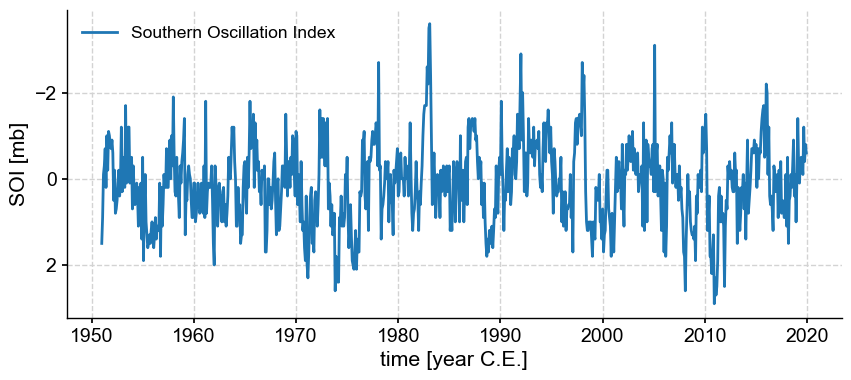

In [2]:
ts = pyleo.utils.load_dataset('SOI')
ts.plot(invert_yaxis=True) # invert y axis so El Niño events plot upward

There are two properties attached to `pyleo.Series` objects:
1. a pandas [datetime_index](https://pandas.pydata.org/docs/dev/reference/api/pandas.DatetimeIndex.html):

In [3]:
ts.datetime_index

DatetimeIndex(['1950-12-31 12:42:56', '1951-01-30 23:11:49',
               '1951-03-02 09:41:14', '1951-04-01 20:10:07',
               '1951-05-02 06:39:01', '1951-06-01 17:08:26',
               '1951-07-02 03:37:19', '1951-08-01 14:06:12',
               '1951-09-01 00:35:37', '1951-10-01 11:04:30',
               ...
               '2019-03-01 20:57:20', '2019-04-01 07:26:14',
               '2019-05-01 17:55:07', '2019-06-01 04:24:32',
               '2019-07-01 14:53:25', '2019-08-01 01:22:19',
               '2019-08-31 11:51:43', '2019-09-30 22:20:37',
               '2019-10-31 08:49:30', '2019-11-30 19:18:55'],
              dtype='datetime64[s]', name='datetime', length=828, freq=None)

2. a dictionary bundling all the metadata:

In [4]:
ts.metadata

{'time_unit': 'year C.E.',
 'time_name': 'time',
 'value_unit': 'mb',
 'value_name': 'SOI',
 'label': 'Southern Oscillation Index',
 'archiveType': 'Instrumental',
 'importedFrom': None,
 'log': None}

When invoking the object itself, the `__repr__` method is called, showing some essential metadata and a compressed view of the data:   

In [5]:
ts

{'archiveType': 'Instrumental', 'label': 'Southern Oscillation Index'}


None
time [year C.E.]
1951.000000    1.5
1951.083333    0.9
1951.166667   -0.1
1951.250000   -0.3
1951.333333   -0.7
              ... 
2019.583333   -0.1
2019.666667   -1.2
2019.750000   -0.4
2019.833333   -0.8
2019.916667   -0.6
Name: SOI [mb], Length: 828, dtype: float64

For a prettier display (in Jupyter notebook only):

In [6]:
ts.view()

,SOI [mb]
time [year C.E.],
1951.000000,1.5
1951.083333,0.9
1951.166667,-0.1
1951.250000,-0.3
1951.333333,-0.7
...,...
2019.583333,-0.1
2019.666667,-1.2
2019.750000,-0.4


## to_pandas()

It is easy to export a pyleoclim Series to a pandas Series:

In [7]:
pdts = ts.to_pandas() #  returns just the Series ; metadata are available at ts.metadata
type(pdts) 

pandas.core.series.Series

It is now a bona fide Pandas series, and we can do with it everything we might do with pandas, like:

In [8]:
pdts.head()

datetime
1950-12-31 12:42:56    1.5
1951-01-30 23:11:49    0.9
1951-03-02 09:41:14   -0.1
1951-04-01 20:10:07   -0.3
1951-05-02 06:39:01   -0.7
Name: SOI, dtype: float64

Or this:

In [9]:
pdts.describe()

count    828.000000
mean       0.119928
std        0.938586
min       -3.600000
25%       -0.500000
50%        0.100000
75%        0.800000
max        2.900000
Name: SOI, dtype: float64

Because Pyleoclim now has pandas under the hood, one can now apply any pandas method to a pyleoclim Series, via a [lambda function](https://www.freecodecamp.org/news/python-lambda-function-explained/). For instance, applying an exponential transform to the data:

In [10]:
import numpy as np
ts.pandas_method(lambda x: x.transform(np.exp))

{'archiveType': 'Instrumental', 'label': 'Southern Oscillation Index'}


None
time [year C.E.]
1951.000000    4.481689
1951.083333    2.459603
1951.166667    0.904837
1951.250000    0.740818
1951.333333    0.496585
                 ...   
2019.583333    0.904837
2019.666667    0.301194
2019.750000    0.670320
2019.833333    0.449329
2019.916667    0.548812
Name: SOI [mb], Length: 828, dtype: float64

## Unit conversions

Pyleoclim now comprehends datestring semantics, which enable enhanced conversions betwen time representations. For instance, converting the SOI series to years before 1950 ("BP"). 

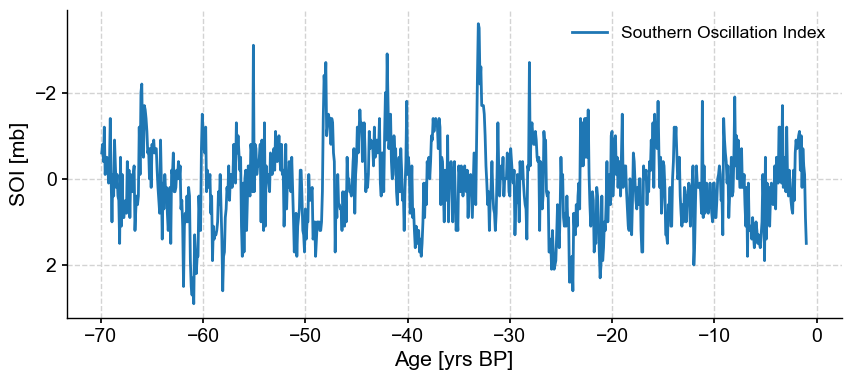

In [11]:
tsBP = ts.convert_time_unit('yrs BP')  
fig, ax = tsBP.plot(invert_yaxis=True) # by default, plots represent values in increasing order, so we reverse the x-axis

The series now plots from recent to old, because the Matplotlib `plot()` function always works with increasing values. However, it is easy to check that it was indeed flipped:

In [12]:
tsBP.view()

,SOI [mb]
Age [yrs BP],
-69.914717,-0.6
-69.831383,-0.8
-69.748050,-0.4
-69.664717,-1.2
-69.581383,-0.1
...,...
-1.331383,-0.7
-1.248050,-0.3
-1.164717,-0.1


The index has been flipped as well:

In [13]:
tsBP.datetime_index

DatetimeIndex(['2019-11-30 19:18:55', '2019-10-31 08:49:30',
               '2019-09-30 22:20:37', '2019-08-31 11:51:43',
               '2019-08-01 01:22:19', '2019-07-01 14:53:25',
               '2019-06-01 04:24:32', '2019-05-01 17:55:07',
               '2019-04-01 07:26:14', '2019-03-01 20:57:20',
               ...
               '1951-10-01 11:04:30', '1951-09-01 00:35:37',
               '1951-08-01 14:06:12', '1951-07-02 03:37:19',
               '1951-06-01 17:08:26', '1951-05-02 06:39:01',
               '1951-04-01 20:10:07', '1951-03-02 09:41:14',
               '1951-01-30 23:11:49', '1950-12-31 12:42:56'],
              dtype='datetime64[s]', name='datetime', length=828, freq=None)

If we wanted to preserve the original time flow (old to recent) in a plot, all you'd have to do is use the `invert_xaxis` parameter:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [yrs BP]', ylabel='SOI [mb]'>)

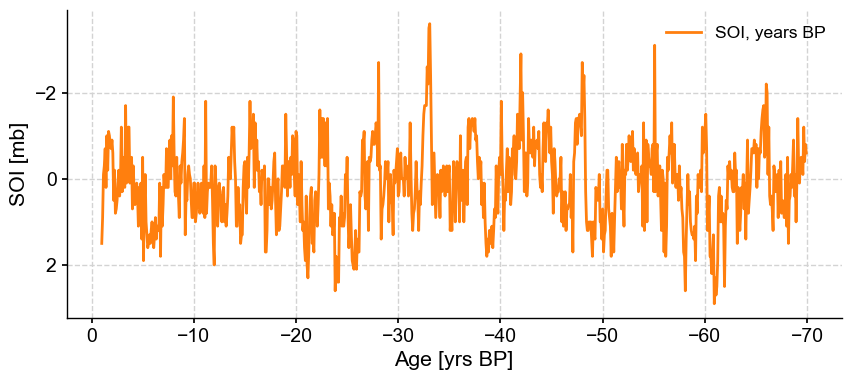

In [14]:
tsBP.plot(invert_yaxis=True, invert_xaxis=True, label = 'SOI, years BP', color='C1') 

(an admittedly contrived example, since no-one in their right mind would cast instrumental series in years BP). 

## Selection

Let's load a true paleoclimate example, the Dome C $CO_2$ [composite](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt), and use `pandas` semantics to select particular values

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [ky BP]', ylabel='$CO_2$ [ppm]'>)

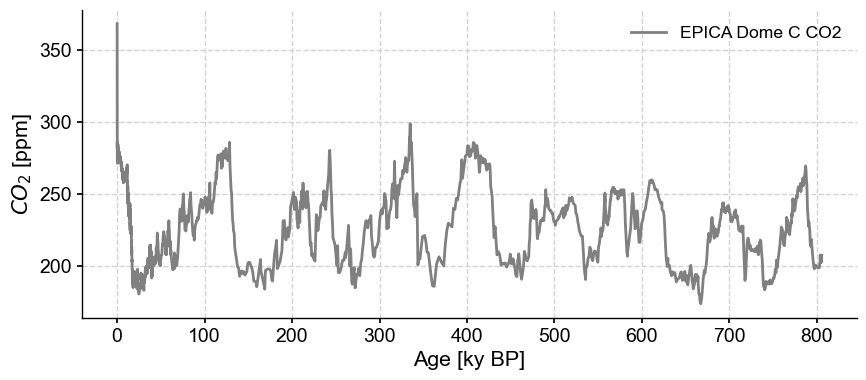

In [15]:
co2ts = pyleo.utils.load_dataset('AACO2')
co2ts.plot(color='gray')

In [16]:
co2ts.metadata

{'time_unit': 'ky BP',
 'time_name': 'Age',
 'value_unit': 'ppm',
 'value_name': '$CO_2$',
 'label': 'EPICA Dome C CO2',
 'archiveType': 'Glacier Ice',
 'importedFrom': 'https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt',
 'log': None}

In [17]:
co2ts.view()

,$CO_2$ [ppm]
Age [ky BP],
-0.05103,368.02
-0.04800,361.78
-0.04628,359.65
-0.04441,357.11
-0.04308,353.95
...,...
803.92528,202.92
804.00987,207.50
804.52267,204.86


To select a particular interval, (say the [Eemian](https://en.wikipedia.org/wiki/Eemian), 115 to 130 ky BP), you can use `sel`:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [ky BP]', ylabel='$CO_2$ [ppm]'>)

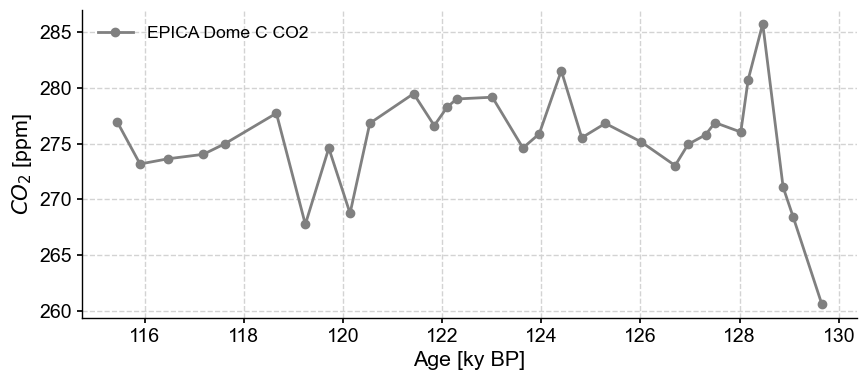

In [18]:
co2_ee = co2ts.sel(time=slice(115,130))
co2_ee.plot(marker='o', color='gray')

If you wanted to extract the time of the maximum value, an easy approach is to use `sel` again:

In [19]:
co2_ee.sel(value=co2_ee.value.max()).view()

,$CO_2$ [ppm]
Age [ky BP],
128.46673,285.76


We zero-ed in on the value ~128.5 ky BP as the highest $CO_2$ concentration in the Eemian. Note that the result is still a Series object (in this case, a very short one!).  Similarly, to identify the timing of glacial maxima by values below 200 ppm, one could select with an open interval:

<Axes: xlabel='Age [ky BP]', ylabel='$CO_2$ [ppm]'>

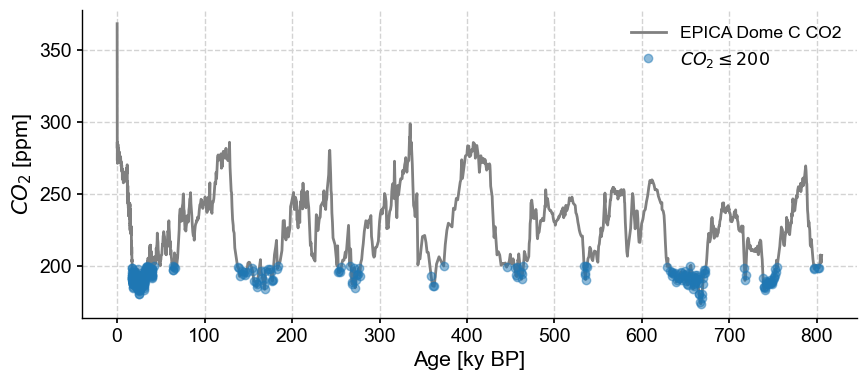

In [20]:
co2_G = co2ts.sel(value=slice(None,200)) # returns a new Series object
fig, ax = co2ts.plot(color='gray')
co2_G.plot(marker='o',linewidth=0,alpha= 0.5, ax=ax,label=r"$CO_2\leq200$") 

For interglacials, select half-open intervals the other way:

<Axes: xlabel='Age [ky BP]', ylabel='$CO_2$ [ppm]'>

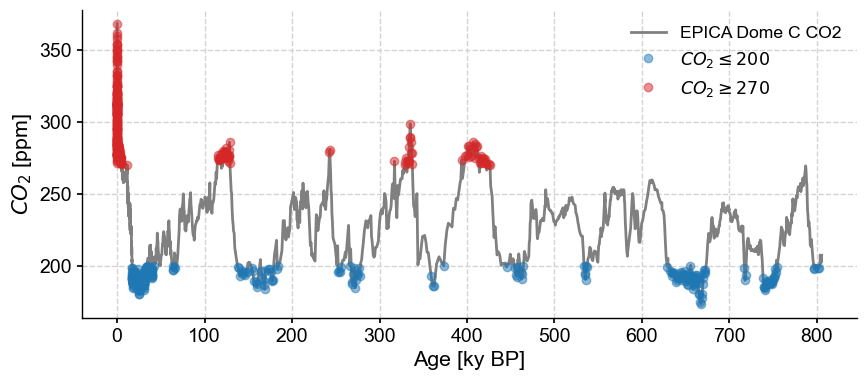

In [21]:
co2_IG = co2ts.sel(value=slice(270,None)) # returns a new Series object
fig, ax = co2ts.plot(color='gray')
co2_G.plot(marker='o',linewidth=0,alpha= 0.5, ax=ax,label=r"$CO_2\leq200$") 
co2_IG.plot(marker='o',linewidth=0, color = 'C3', alpha= 0.5, ax=ax,label=r"$CO_2\geq270$") 

Again, both of these are Series objects, albeit highly discontinuous ones. 
Science Remark: admittedly, an absolute threshold for defining interglacials makes little sense. A smarter way would be to use [clustering](https://en.wikipedia.org/wiki/Cluster_analysis), as implemented in the `outliers()` method and a [dedicated tutorial](./L2_outlier_detection.md). 

## CSV Import/Export

pandas integration allows a very easy roundtrip with CSV files:

### Exporting to CSV

In [22]:
filename = '../data/EPICA_Dome_C_CO2.csv'
co2ts.to_csv(path = filename)

Series exported to ../data/EPICA_Dome_C_CO2.csv


The path name is optional; if no file name is provided (as is the case here), the file is named after the Series' label. This is another reason to choose meaningful and relatively concise labels!

### Importing from CSV
Read the file back in and gives the same `Series`:

In [23]:
co2ts2 = pyleo.Series.from_csv(path='../data/EPICA_Dome_C_CO2.csv')
co2ts2.equals(co2ts) 

Time axis values sorted in ascending order


(True, True)

Note the use of the `equals()` method, inspired the [eponymous method from pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.equals.html). The Pyleoclim implementation returns two boolean objects: the first says whether the two pandas Series are the same; the second whether the metadata are the same. Fortunately, we landed back on our feet. 

## Resampling

One of pandas' most powerful capabilities is [resampling()](https://pandas.pydata.org/docs/user_guide/timeseries.html#resampling) series to attain various temporal resolutions. Pyleoclim implements a function of the same name, but using normal "paleo-speak" to define resolution. For instance, let's coarse-grain on 5,000 year intervals:

In [24]:
co2_5k = co2ts.resample('5ka')
type(co2_5k)

pyleoclim.core.series.SeriesResampler

The output of this function is a variant on a pandas [resampler](https://pandas.pydata.org/docs/reference/resampling.html); the values then need to be aggregated or transformed. For our purpose, let's average them over those 5ky bins:

<Axes: xlabel='Age [ky BP]', ylabel='$CO_2$ [ppm]'>

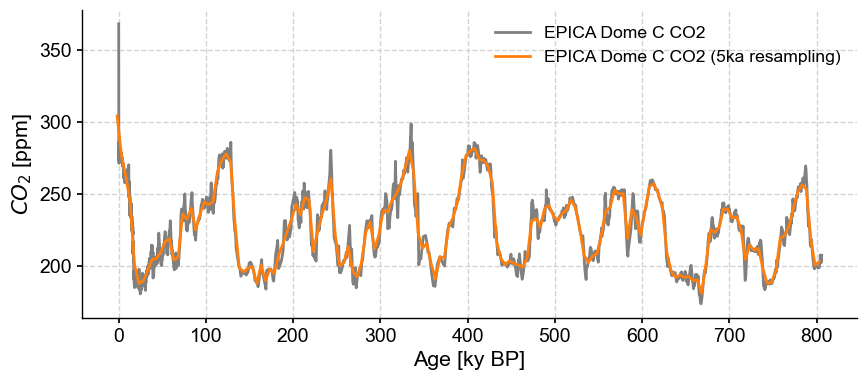

In [25]:
co2_5kavg = co2_5k.mean() # the aggregator here is simply the mean
fig, ax = co2ts.plot(color='gray')
co2_5kavg.plot(ax=ax,color='C1')         

One notable distinction to standard `pandas` resampling is that Pyleoclim aligns the resampled index to the _midpoint_ of each interval, to minimize age offsets. pandas aligns to the beginning of an interval.  

In terms of nomenclature, `resample()` can understand several appreviations for "kiloyear", such as 'ka', 'ky', or 'kyrs'. In fact, all those would work:

In [26]:
pyleo.utils.tsbase.MATCH_KA

frozenset({'ka', 'kiloyear', 'kiloyr', 'kiloyrs', 'ky', 'kyr', 'kyrs'})

For millions of years, use those:

In [27]:
pyleo.utils.tsbase.MATCH_MA

frozenset({'ma', 'my', 'myr', 'myrs'})

and so on for other multiples, like years (`pyleo.utils.tsbase.MATCH_A`) or billion years (`pyleo.utils.tsbase.MATCH_GA`) 


Further, the Resampler class allows to choose other statistics than the mean, like a running standard deviation:

In [28]:
co2_5k.std().view()

,$CO_2$ [ppm]
Age [ky BP],
-1.831006,21.187646
3.169000,4.424875
8.169003,2.471905
13.169008,12.374541
18.169011,13.381836
...,...
783.169643,3.247548
788.169646,15.221735
793.169651,8.006723


## Creating and manipulating MultipleSeries objects

Here we showcase new shorthands to easily create and manipulate MultipleSeries objects. 

First, let's load another dataset with a time axis that has some overlap with the EPICA DOME C $CO_2$ record:

In [29]:
lr04 = pyleo.utils.load_dataset('LR04')
edc = pyleo.utils.load_dataset('EDC-dD')

We then create a `MultipleSeries` object using the `&` shorthand:

In [30]:
ms = lr04.flip() & edc & co2ts
type(ms)

The two series have different lengths, left: 2115 vs right: 1901
Metadata are different:
value_unit property -- left: ‰, right: ppm
value_name property -- left: $\delta^{18} \mathrm{O}$ x (-1), right: $CO_2$
label property -- left: LR04 benthic stack, right: EPICA Dome C CO2
archiveType property -- left: Marine Sediment, right: Glacier Ice
importedFrom property -- left: None, right: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt
The two series have different lengths, left: 5785 vs right: 1901
Metadata are different:
time_unit property -- left: y BP, right: ky BP
value_unit property -- left: ‰, right: ppm
value_name property -- left: $\delta \mathrm{D}$, right: $CO_2$
label property -- left: EPICA Dome C deuterium, right: EPICA Dome C CO2
importedFrom property -- left: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt, right: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co

pyleoclim.core.multipleseries.MultipleSeries

(<Figure size 640x480 with 4 Axes>,
 {0: <Axes: ylabel='$\\delta^{18} \\mathrm{O}$ x (-1) [‰]'>,
  1: <Axes: ylabel='$\\delta \\mathrm{D}$ [‰]'>,
  2: <Axes: ylabel='$CO_2$ [ppm]'>,
  3: <Axes: xlabel='Age [ky BP]'>})

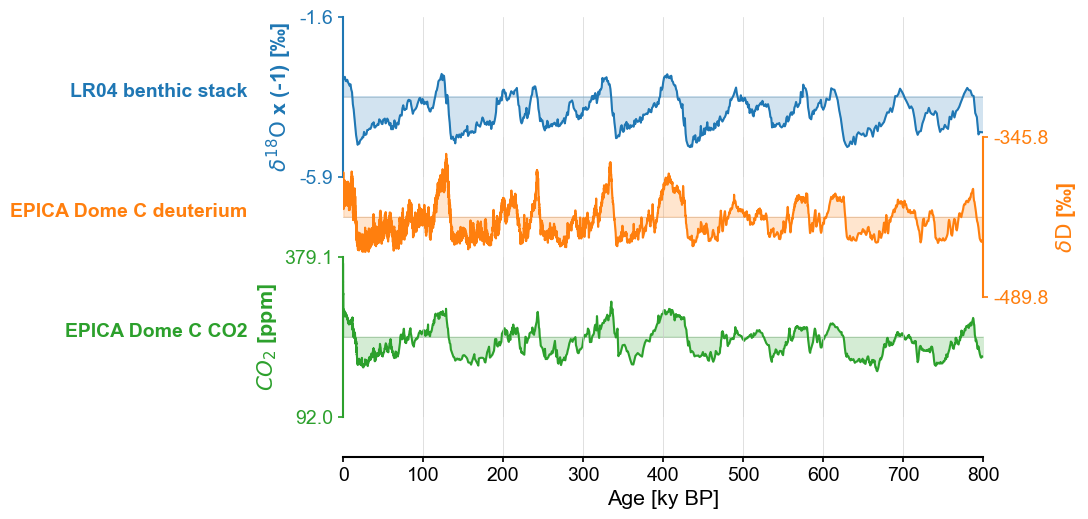

In [31]:
ms.stackplot(xlim=(0,800))

In [32]:
ms3 - lr04.label
print([ts.label for ts in ms3.series_list])

NameError: name 'ms3' is not defined

### Exporting to pandas

The `MultipleSeries` class also has a `to_pandas()` method; this one exports to a dataframe:

In [ ]:
df = ms.to_pandas()
df.head()

Some plotting functions work out of the proverbial box:

In [ ]:
df.hist()

Alas, `df.plot()` wouldn't work, as Matplotlib assumes dates must be between year 0001 and 9999. 

As with `Series`, `ms.to_csv()` will export the object to a CSV file. We skip this here, as the output is not very graphical. 

In [ ]:
%watermark -n -u -v -iv -w